[ 0.01956522 -0.09657617 -0.13674397 -0.09945652 -0.19590304 -0.12105978
 -0.16335697 -0.62282609 -0.42717391 -0.15695975 -0.04891304 -0.04402174
 -0.07505054 -0.12484855  0.11086957]


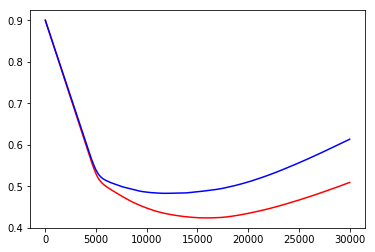

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.cross_validation import train_test_split 
x,y = load_svmlight_file("E:/australian_scale.txt")
x=x.toarray()
m, n = np.shape(x)
a=np.ones((m))
X=np.column_stack((x,a))
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
m_train,n_train= np.shape(X_train)
m_test,n_test= np.shape(X_test)
w = np.zeros(n+1)
W=w.transpose()
C=0.9
η = 0.0001
epoch=30000
Iteration=range(0,epoch)
Ltrain=[]
Lvalidation=[]
def g(x,y,i):
    return 1-y[i]*np.dot(W.transpose(),x[i].transpose())
gradient=0
for i in range(m_train):
    if g(X_train,y_train,i)>=0:
        gradient += W-C*np.dot(y_train[i], X_train[i].transpose())
    else:
        gradient += W  
gradient /=m_train
print(gradient)
for i in range(0,epoch):
    loss_train = np.dot(W.transpose(),W)/2
    for j in range(m_train):
        if g(X_train,y_train,j)>=0:
            loss_train += C*g(X_train,y_train,j)
    loss_train /=m_train
    Ltrain.append(loss_train) 
    loss_test= np.dot(W.transpose(),W)/2
    for k in range(m_test):
        if g(X_test,y_test,k)>=0:
            loss_test += C*g(X_test,y_test,k)
    loss_test /=m_test
    Lvalidation.append(loss_test)
    W = W - η* gradient
plt.plot(Iteration,Ltrain,'r',label='Ltrain') 
plt.plot(Iteration, Lvalidation,'b',label=' Lvalidation') 
plt.show()
